In [37]:
import tensorflow as tf
from keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [38]:
from locale import normalize


(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [39]:
classes = ['airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

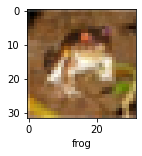

In [40]:
def plot_sample(X,y, index):
    plt.figure(figsize=(12,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])
plot_sample(X_train , y_train, 0)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
model = keras.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 53s 33ms/step - loss: 1.8109 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6215 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5399 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4776 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4305 - accuracy: 0.4978


In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.4893 - accuracy: 0.4658


[1.4892604351043701, 0.4657999873161316]

In [46]:
model2 = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.fit(X_train, y_train, epochs = 10)


Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4244 - accuracy: 0.4894
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0802 - accuracy: 0.6234
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9535 - accuracy: 0.6682
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8731 - accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8083 - accuracy: 0.7204
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7522 - accuracy: 0.7383
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7034 - accuracy: 0.7561
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6608 - accuracy: 0.7690
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6202 - accuracy: 0.7848
Epoch 10/10
1563/1563 [==============================] - 34s 21m

In [47]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8960 - accuracy: 0.7012


[0.8960274457931519, 0.701200008392334]

In [54]:
model2.save('model1', '/Users/thomasbouiniere/Desktop/CS/2A/Pole projet/watermarking')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [52]:
model3 = models.load_model('model1')

In [53]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8960 - accuracy: 0.7012


[0.8960274457931519, 0.701200008392334]